<a href="https://www.kaggle.com/code/nishitkaul88/eda-and-lr-nba-data-height-weight-dreb-age?scriptVersionId=160530798" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# EDA and Linear Regression on NBA-Data
Forget high-fives and alley-oops, this data-driven slam dunk is all about understanding player performance through the lens of Linear Regression. Today, we enter the statistical arena, ready to dissect the relationship between physical attributes and on-court prowess.

 We'll start by isolating individual variables, like height and weight, and analyzing their impact on a key metric: Defensive Rebounding Percentage (DRB%). Imagine it as a statistical microscope, zooming in to see how these basic physical traits influence a player's ability to secure those crucial defensive boards. Linear regression will be our tool, crafting equations that quantify these relationships, revealing if taller players truly rule the glass and if heavier frames translate to rebounding dominance.

 But the fun doesn't stop there! We'll then level up to a full-court press, incorporating both height and weight into our model. Think of it as a statistical double-team, capturing the combined effect of these physical attributes on DRB%. Will the combined influence reveal even stronger trends, or will unexpected interactions emerge, challenging our initial assumptions?

 This notebook is your courtside seat to a data-driven analysis, where statistics replace trash talk and regression models dominate the headlines. We'll:

1. Isolating individual variables: Analyze the one-on-one relationship between height, weight, and DRB%, using multiple regression as our statistical weapon.

2. Unveiling multivariable magic: Combine height and weight in a full-court press regression model, exploring the intricate interplay between these factors and their impact on defensive rebounding.

3. Identifying trends and secrets: Interpret the regression models, uncovering the hidden narratives within the data and potentially discovering unique insights into player performance.
 So, grab your data jerseys and statistical sneakers, because we're about to step onto the court of analysis! Prepare to witness the power of linear regression as it cracks the code of NBA performance, one equation at a time.

 Let the data play begin!

 **Here's a detailed description of the packages used in this NBA analysis:**

**Core Data Manipulation and Visualization:**

- **numpy**: Provides efficient numerical computations and array operations for handling the NBA data.
- **pandas**: Creates and manipulates DataFrames, enabling easy data exploration and cleaning.
- **matplotlib.pyplot**: Generates informative visualizations like plots and charts to visualize trends and relationships within the data.
- **seaborn**: Enhances visual clarity and aesthetics, building upon matplotlib for visually appealing statistical graphics.

**Machine Learning:**

- **sklearn.model_selection**: Provides tools for splitting data into training and testing sets, implementing cross-validation, and evaluating model performance.
- **sklearn.linear_model**: Houses various linear regression models, including LinearRegression, Lasso, and Ridge, for building predictive models.

**Evaluation and Diagnostics:**

- **sklearn.metrics**: Offers a suite of metrics to assess model performance, such as mean squared error, R-squared, and more.
- **scipy.stats.mstats**: Contains statistical tests, including normaltest, to check for normality in data distributions, a crucial assumption for linear regression.
- **scipy.stats**: Provides additional statistical tools, like the boxcox function for transforming non-normal data to better suit linear regression assumptions.

**Data Preprocessing:**

- **sklearn.preprocessing**: Includes techniques for data scaling and transformation, such as StandardScaler, which standardizes features to have a mean of 0 and a standard deviation of 1, often enhancing model performance.
- **PolynomialFeatures**: Generates polynomial features, allowing for exploration of non-linear relationships between variables.

**Model Building and Refinement:**

- **sklearn.pipeline**: Streamlines the modeling process by creating a sequence of steps, including preprocessing and model fitting, making model development more efficient.
- **sklearn.model_selection.GridSearchCV**: Automates hyperparameter tuning, searching for optimal model configurations to improve model performance.

**3D Visualization:**

- **mpl_toolkits.mplot3d**: Enables the creation of 3D plots, particularly useful for visualizing relationships between multiple variables in a more intuitive and immersive manner.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings

### Loading the data

In [2]:
nba_data = pd.read_csv("/kaggle/input/nba-players-data/all_seasons.csv")

# nba_data (You can run this to check the maximum data) It has over 12843 players

nba_data.head(10)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
5,5,Gerald Wilkins,ORL,33.0,198.12,102.058200,Tennessee-Chattanooga,USA,1985,2,...,10.6,2.2,2.2,-5.8,0.031,0.064,0.203,0.503,0.143,1996-97
6,6,Gheorghe Muresan,WAS,26.0,231.14,137.438376,NaN,USA,1993,2,...,10.6,6.6,0.4,6.9,0.098,0.217,0.185,0.618,0.024,1996-97
7,7,Glen Rice,CHH,30.0,203.20,99.790240,Michigan,USA,1989,1,...,26.8,4.0,2.0,3.2,0.025,0.087,0.272,0.605,0.088,1996-97
8,8,Glenn Robinson,MIL,24.0,200.66,106.594120,Purdue,USA,1994,1,...,21.1,6.3,3.1,-2.9,0.051,0.144,0.278,0.528,0.146,1996-97
9,9,Grant Hill,DET,24.0,203.20,102.058200,Duke,USA,1994,1,...,21.4,9.0,7.3,6.9,0.049,0.232,0.283,0.556,0.356,1996-97


In [3]:
nba_data.head(10)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
5,5,Gerald Wilkins,ORL,33.0,198.12,102.058200,Tennessee-Chattanooga,USA,1985,2,...,10.6,2.2,2.2,-5.8,0.031,0.064,0.203,0.503,0.143,1996-97
6,6,Gheorghe Muresan,WAS,26.0,231.14,137.438376,NaN,USA,1993,2,...,10.6,6.6,0.4,6.9,0.098,0.217,0.185,0.618,0.024,1996-97
7,7,Glen Rice,CHH,30.0,203.20,99.790240,Michigan,USA,1989,1,...,26.8,4.0,2.0,3.2,0.025,0.087,0.272,0.605,0.088,1996-97
8,8,Glenn Robinson,MIL,24.0,200.66,106.594120,Purdue,USA,1994,1,...,21.1,6.3,3.1,-2.9,0.051,0.144,0.278,0.528,0.146,1996-97
9,9,Grant Hill,DET,24.0,203.20,102.058200,Duke,USA,1994,1,...,21.4,9.0,7.3,6.9,0.049,0.232,0.283,0.556,0.356,1996-97


## Refining 

Since we do not need the Unnamed column here, we'll just remove it

In [4]:
nba_data.drop(columns='Unnamed: 0',inplace = True)

In [5]:
nba_data.head(10)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
5,Gerald Wilkins,ORL,33.0,198.12,102.058200,Tennessee-Chattanooga,USA,1985,2,47,...,10.6,2.2,2.2,-5.8,0.031,0.064,0.203,0.503,0.143,1996-97
6,Gheorghe Muresan,WAS,26.0,231.14,137.438376,NaN,USA,1993,2,30,...,10.6,6.6,0.4,6.9,0.098,0.217,0.185,0.618,0.024,1996-97
7,Glen Rice,CHH,30.0,203.20,99.790240,Michigan,USA,1989,1,4,...,26.8,4.0,2.0,3.2,0.025,0.087,0.272,0.605,0.088,1996-97
8,Glenn Robinson,MIL,24.0,200.66,106.594120,Purdue,USA,1994,1,1,...,21.1,6.3,3.1,-2.9,0.051,0.144,0.278,0.528,0.146,1996-97
9,Grant Hill,DET,24.0,203.20,102.058200,Duke,USA,1994,1,3,...,21.4,9.0,7.3,6.9,0.049,0.232,0.283,0.556,0.356,1996-97


In [6]:
nba_data.shape

(12844, 21)

In [7]:
nba_data.isnull().sum()

player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

### Exploration

The **nba_data.describe()** command is our trusty assistant, delivering a concise summary of the key numerical attributes within our dataset. It's like a stat sheet for statisticians, revealing the average heights, weights, defensive rebounding percentages, and other metrics that will guide our analysis.

 By studying these descriptive statistics, we'll gain a deeper understanding of the players we're analyzing. We'll uncover the typical ranges for each variable, identify any potential outliers that might skew our results, and start to form initial hypotheses about the relationships we expect to find.

In [8]:
nba_data.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


### Plotting some statistics

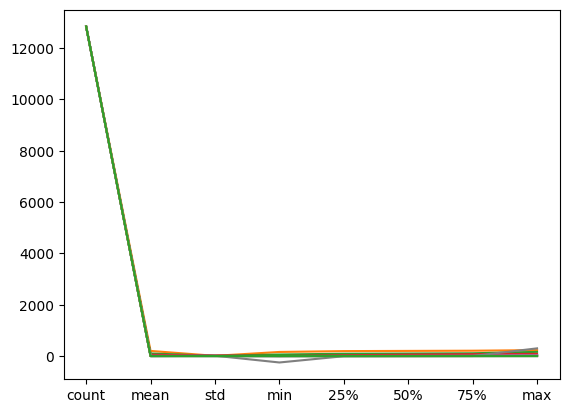

In [9]:
plt.plot(nba_data.describe())

### Understanding the relation between height and weight

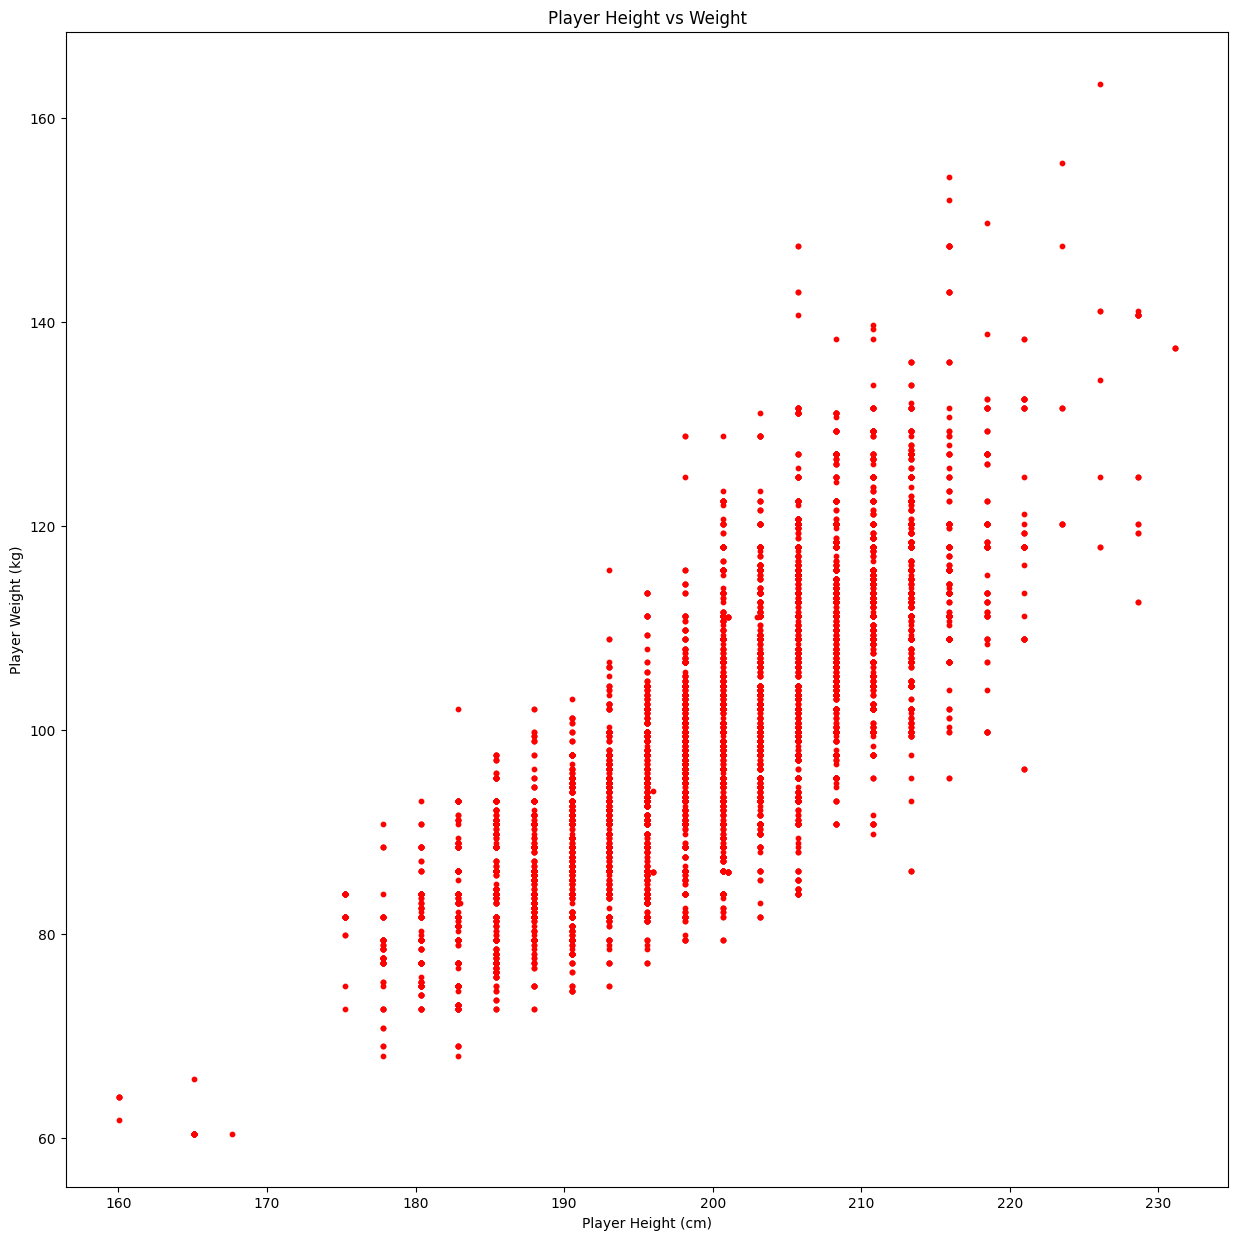

In [10]:
plt.figure(figsize=(15,15))
ax = plt.axes()

ax.scatter(nba_data.player_height, nba_data.player_weight,s=10,c='r')

ax.set(xlabel='Player Height (cm)',
       ylabel='Player Weight (kg)',
       title='Player Height vs Weight');

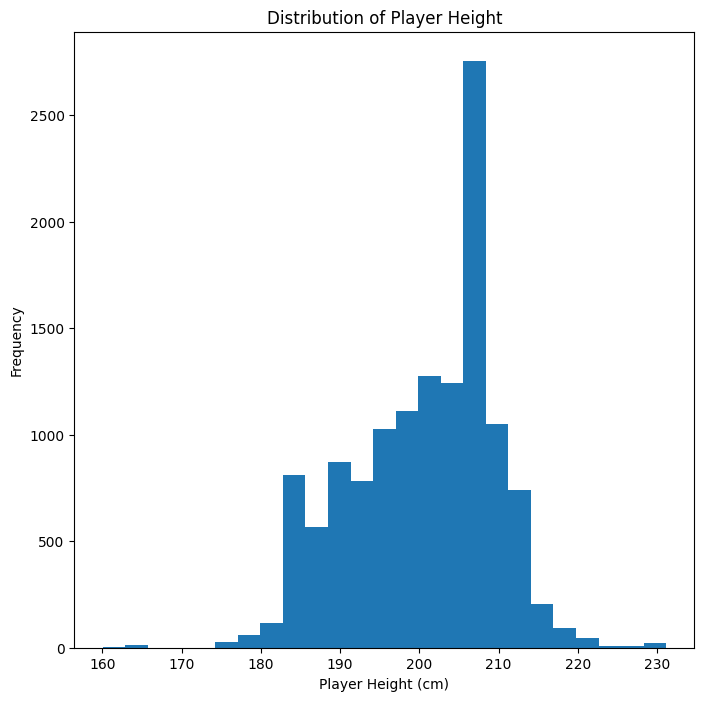

In [11]:
plt.figure(figsize=(8,8))
ax = plt.axes()
ax.hist(nba_data.player_height, bins=25);

ax.set(xlabel='Player Height (cm)', 
       ylabel='Frequency',
       title='Distribution of Player Height');

## Fact-Check

Here we'll actually check whether **Heighted Players** actually dominate or not

<Axes: >

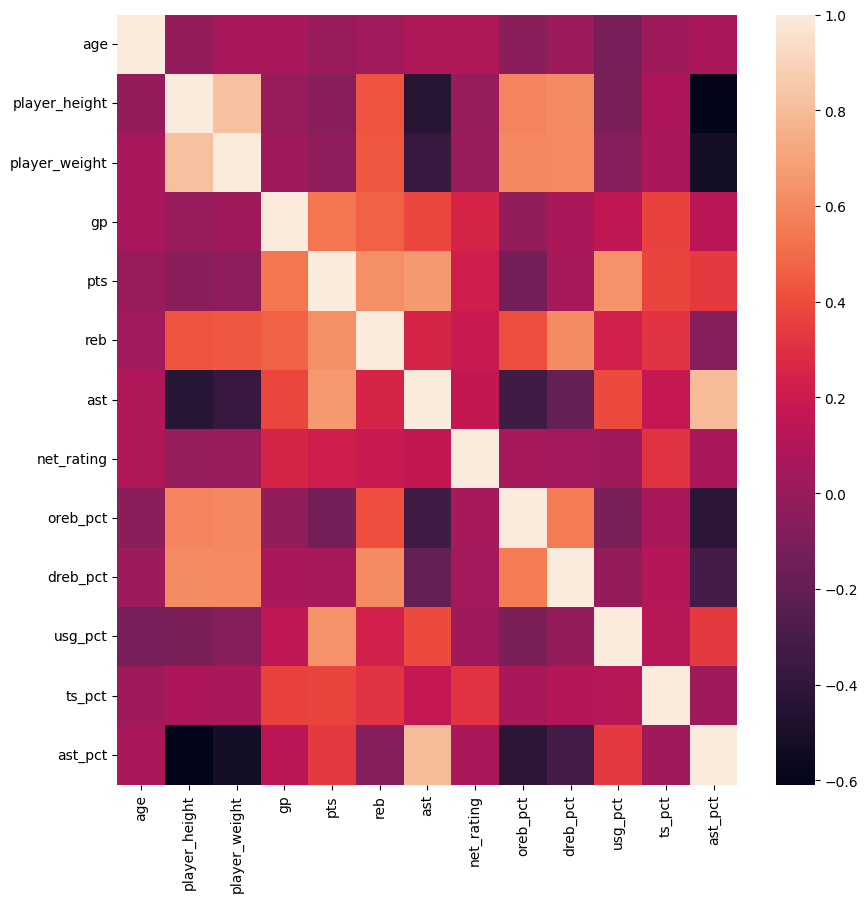

In [12]:
heatmap_data = nba_data[['age','player_height','player_weight','gp','pts','reb','ast','net_rating','oreb_pct','dreb_pct','usg_pct',
                        'ts_pct','ast_pct']]
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sea.heatmap(heatmap_data.corr())

In [13]:
heatmap_data.corr()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
age,1.000000,-0.007904,0.063561,0.057442,0.011353,0.037386,0.092359,0.092896,-0.055228,0.018774,-0.113882,0.025245,0.069029
player_height,-0.007904,1.000000,0.822141,0.004963,-0.055284,0.424220,-0.442781,-0.003074,0.589538,0.614273,-0.104011,0.076797,-0.608696
player_weight,0.063561,0.822141,1.000000,0.022828,-0.025023,0.438112,-0.371675,0.003547,0.599511,0.605639,-0.065811,0.070992,-0.521939
gp,0.057442,0.004963,0.022828,1.000000,0.536003,0.471405,0.382726,0.248412,-0.014763,0.067911,0.147248,0.367876,0.131720
pts,0.011353,-0.055284,-0.025023,0.536003,1.000000,0.624509,0.664320,0.215199,-0.125164,0.055669,0.641469,0.373439,0.337339
reb,0.037386,0.424220,0.438112,0.471405,0.624509,1.000000,0.247841,0.187820,0.407960,0.611899,0.232968,0.313451,-0.062654
ast,0.092359,-0.442781,-0.371675,0.382726,0.664320,0.247841,1.000000,0.162865,-0.337970,-0.192146,0.396505,0.174494,0.803150
net_rating,0.092896,-0.003074,0.003547,0.248412,0.215199,0.187820,0.162865,1.000000,0.055761,0.047928,0.026575,0.313251,0.063809
oreb_pct,-0.055228,0.589538,0.599511,-0.014763,-0.125164,0.407960,-0.337970,0.055761,1.000000,0.555358,-0.100091,0.060572,-0.424056
dreb_pct,0.018774,0.614273,0.605639,0.067911,0.055669,0.611899,-0.192146,0.047928,0.555358,1.000000,-0.007402,0.105150,-0.317477


### Country-wise distribution of heights
 In this section we compare the height of players w.r.t to their countries to check which country got some good genetics

In [14]:
player_height_column = nba_data[['player_height','country']]
player_height_column.groupby('country').mean()


,player_height
country,
Angola,206.375000
Argentina,199.333134
Australia,199.796400
Austria,214.811429
Bahamas,202.292857
...,...
Ukraine,210.255556
United Kingdom,203.305833
Uruguay,208.280000


In [15]:
nba_data.duplicated(keep=False).sum()

0

## Linear Regression on Player Height and Player Weight
Simple linear regression, as there is high correlation between player_height and player_weight I've droped rest of the columns and split player_weight into X and player_height to y.

In [16]:
data_phpw = nba_data.drop(['age','player_name','team_abbreviation','college','country','draft_year','draft_round','draft_number','season','gp','pts','reb','ast','net_rating','usg_pct','ts_pct','ast_pct','oreb_pct','dreb_pct'], axis=1)

In [17]:
data_phpw

,player_height,player_weight
0,193.04,94.800728
1,190.50,86.182480
2,203.20,103.418976
3,203.20,102.058200
4,213.36,119.748288
...,...,...
12839,213.36,127.005760
12840,213.36,86.182480
12841,205.74,102.511792
12842,208.28,113.398000


In [18]:
data_phpw.corr()

,player_height,player_weight
player_height,1.000000,0.822141
player_weight,0.822141,1.000000


In [19]:
X = data_phpw.iloc[:,1:].values
y = data_phpw.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None,)
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')
regr = LinearRegression()
regr.fit(X_train, y_train)
print(f'Coefficient: {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

X_train: (9633, 1)
X_test: (3211, 1)
y_train: (9633,)
y_test: (3211,)
Coefficient: [0.60067646]
Intercept: 140.35271895460423


In [20]:
y_pred = np.round(regr.predict(X_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 4.137050763002179
Residual Sum of Squares(MSE): 27.265069542198695
R2-Score: 0.6770646603509813


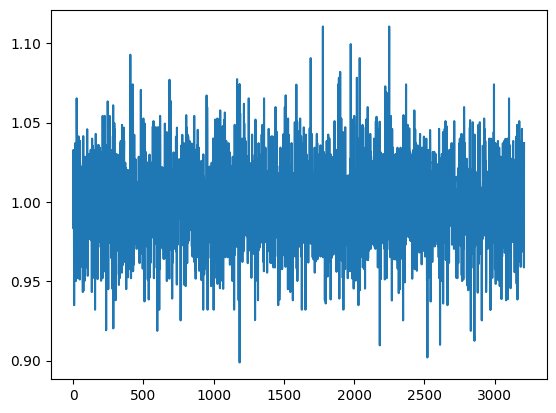

In [21]:
ratio1 = y_test / y_pred
plt.plot(ratio1)

## Linear regression on Player Age and their respective picking (draft) years

We have only used the age and draft_year column here, so we drop rest of the columns

In [22]:
data_pady = nba_data.drop(['player_height','player_name','team_abbreviation','college','country','player_weight','draft_round','draft_number','season','gp','pts','reb','ast','net_rating','usg_pct','ts_pct','ast_pct','oreb_pct','dreb_pct'], axis=1)

In [23]:
data_pady

,age,draft_year
0,22.0,1996
1,28.0,1994
2,26.0,1993
3,30.0,1989
4,23.0,1995
...,...,...
12839,29.0,2014
12840,20.0,Undrafted
12841,25.0,2017
12842,24.0,2021


Since, we don't need to consider players who were not drafted, therefore, I am just eliminating those values too.

In [24]:
to_drop = data_pady[((data_pady.draft_year == 'Undrafted'))].index
new_data_pady= data_pady.drop(to_drop)

In [25]:
new_data_pady.head(40)

,age,draft_year
0,22.0,1996
1,28.0,1994
2,26.0,1993
3,30.0,1989
4,23.0,1995
5,33.0,1985
6,26.0,1993
7,30.0,1989
8,24.0,1994
9,24.0,1994


Here, is a key relation between respective ages and draft_years

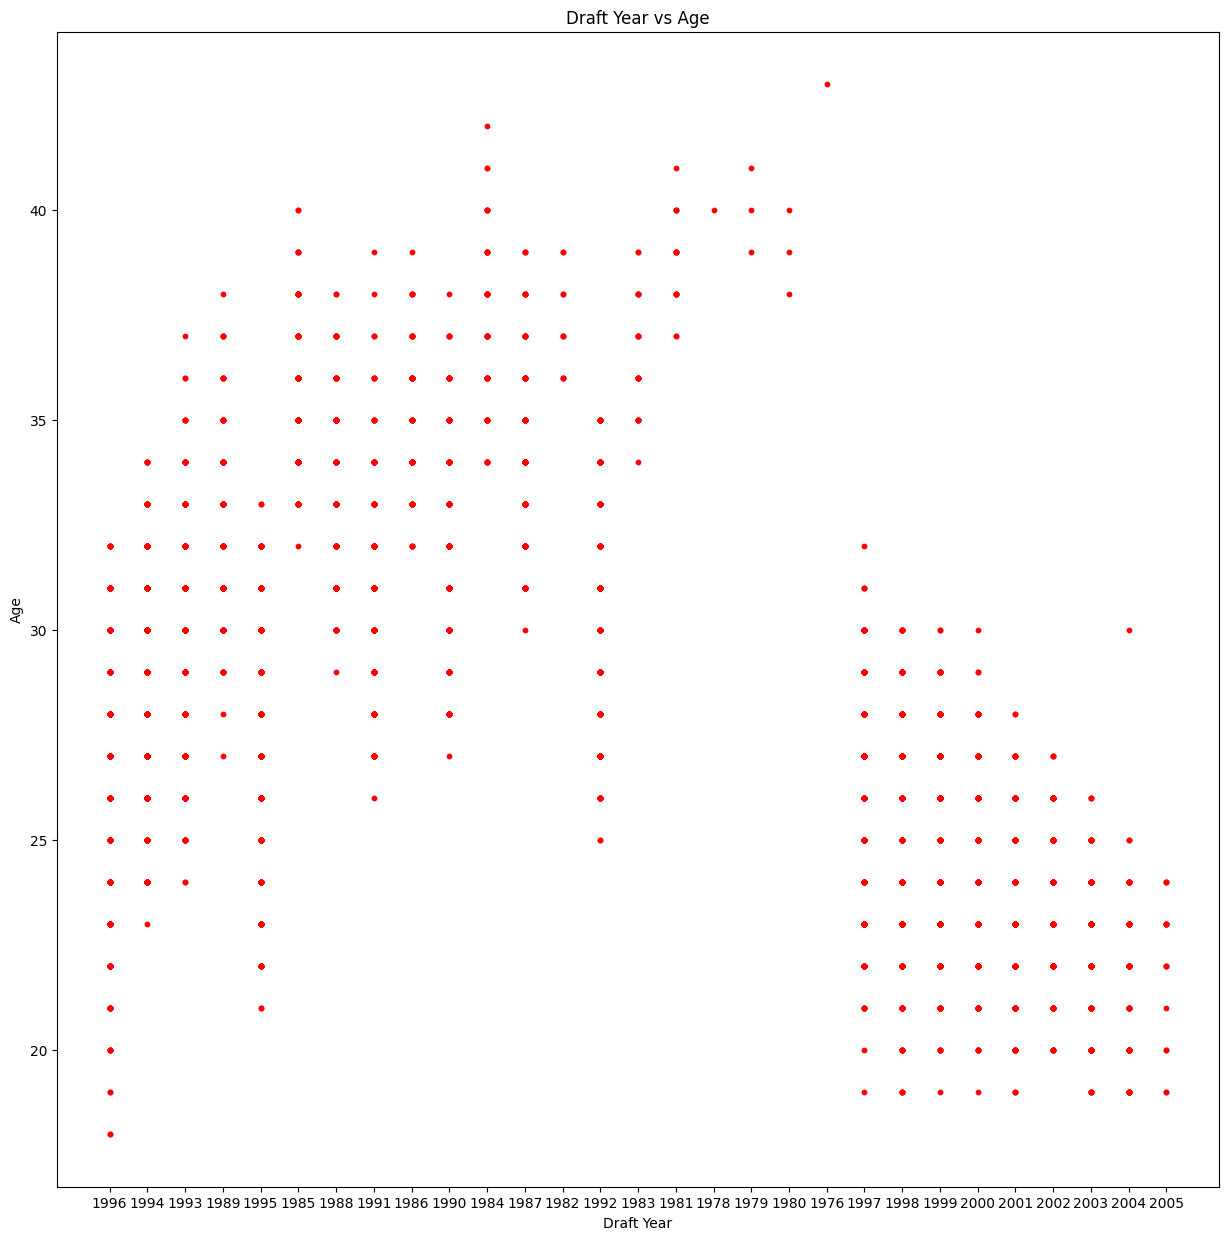

In [26]:
dummy_relation = new_data_pady.head(3500)
plt.figure(figsize=(15,15))
ax = plt.axes()

ax.scatter(dummy_relation.draft_year, dummy_relation.age,s=10,c='r')

ax.set(xlabel='Draft Year',
       ylabel='Age',
       title='Draft Year vs Age');

In [27]:
new_data_pady.corr()

,age,draft_year
age,1.000000,-0.559036
draft_year,-0.559036,1.000000


Here, we see they have a negative relationship, so the higher the year, the lesser the age, which is absolutely right, a 18 year old boy born in 1980 would be drafted in 1998 and a 19 year old boy now, would have been drafted a year earlier.

In [28]:
A = new_data_pady.iloc[:,1:].values
b = new_data_pady.iloc[:,0].values
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.25, random_state=None,)
print(f'A_train: {A_train.shape}\nA_test: {A_test.shape}\nb_train: {b_train.shape}\nb_test: {b_test.shape}')
regr = LinearRegression()
regr.fit(A_train, b_train)
print(f'Coefficient: {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

A_train: (7864, 1)
A_test: (2622, 1)
b_train: (7864,)
b_test: (2622,)
Coefficient: [-0.27625221]
Intercept: 580.6608616379963


In [29]:
b_pred = np.round(regr.predict(A_test), decimals=2)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(b_test, b_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(b_test, b_pred)}')
print(f'R2-Score: {metrics.r2_score(b_test, b_pred)}')

Mean Absolute Error(MAE): 3.001586575133486
Residual Sum of Squares(MSE): 13.709687337909992
R2-Score: 0.31807197503699114


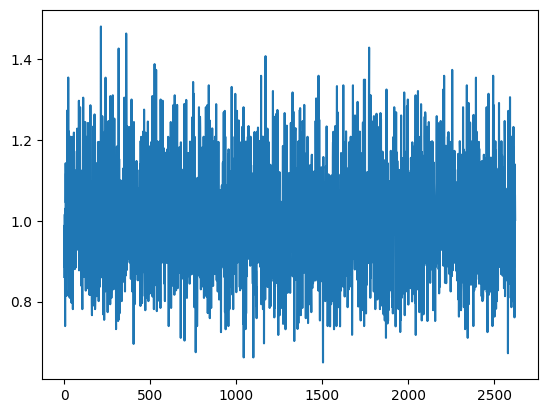

In [30]:
ratio2 = b_test / b_pred
plt.plot(ratio2)

In [31]:
datx =nba_data.drop(['oreb_pct','age','player_name','team_abbreviation','college','country','draft_year','draft_round','draft_number','season','gp','pts','reb','ast','net_rating','usg_pct','ts_pct','ast_pct'], axis=1)

In [32]:
datx

,player_height,player_weight,dreb_pct
0,193.04,94.800728,0.071
1,190.50,86.182480,0.111
2,203.20,103.418976,0.185
3,203.20,102.058200,0.111
4,213.36,119.748288,0.169
...,...,...,...
12839,213.36,127.005760,0.243
12840,213.36,86.182480,0.065
12841,205.74,102.511792,0.180
12842,208.28,113.398000,0.175


### Comparing Height, Weight and Defensive Rebounding Percentage 
 Let's check if it is correct to say that players with higher height have good defense advantage. 
 
**dreb_pct** -> Defensive Rebounding Percentage Definition. The percentage of available defensive rebounds a player or team obtains while on the floor.

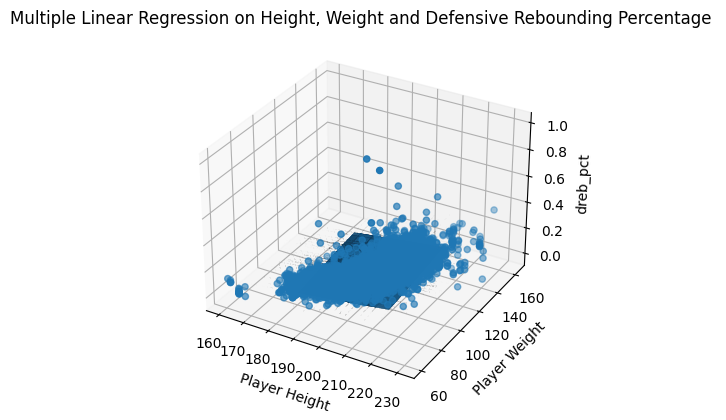

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = datx['player_height']
y = datx['player_weight']
z = datx['dreb_pct']

ax.scatter(x, y, z)

A = np.vstack([x, y, np.ones_like(x)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, z, rcond=None)

x_plane, y_plane = np.meshgrid(x, y)
z_plane = plane_coef[0] * x_plane + plane_coef[1] * y_plane + plane_coef[2]

ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5)

ax.set_xlabel('Player Height')
ax.set_ylabel('Player Weight')
ax.set_zlabel('dreb_pct')
plt.title('Multiple Linear Regression on Height, Weight and Defensive Rebounding Percentage ')

plt.show()

# Conclusion
  I am still looking to explore more about this data. Kindly suggest some cool ideas I should try, and **please upvote !**